## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  41.929524   323.524313  0.378210  5.662881  1.205154
1  28.859927   602.890879  0.552961  9.731692  1.467174
2  77.124715   509.135571  0.719437  1.188832  1.352881
3  85.360953  1161.392585  0.489099  7.438156  1.497026
4   7.202382   660.535681  0.589339  3.985890  1.496553


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8711084	total: 74.6ms	remaining: 1m 14s
1:	learn: 0.8636280	total: 75.1ms	remaining: 37.5s
2:	learn: 0.8592669	total: 75.5ms	remaining: 25.1s
3:	learn: 0.8518871	total: 76ms	remaining: 18.9s
4:	learn: 0.8453471	total: 76.4ms	remaining: 15.2s
5:	learn: 0.8405433	total: 76.7ms	remaining: 12.7s
6:	learn: 0.8325584	total: 77ms	remaining: 10.9s
7:	learn: 0.8255511	total: 77.3ms	remaining: 9.59s
8:	learn: 0.8194515	total: 77.6ms	remaining: 8.55s
9:	learn: 0.8156421	total: 78ms	remaining: 7.72s
10:	learn: 0.8083215	total: 78.3ms	remaining: 7.04s
11:	learn: 0.8024085	total: 78.7ms	remaining: 6.48s
12:	learn: 0.7948722	total: 79ms	remaining: 6s
13:	learn: 0.7888187	total: 79.4ms	remaining: 5.59s
14:	learn: 0.7826648	total: 79.6ms	remaining: 5.23s
15:	learn: 0.7774007	total: 79.9ms	remaining: 4.91s
16:	learn: 0.7715196	total: 80.2ms	remaining: 4.64s
17:	learn: 0.7660179	total: 80.6ms	remaining: 4.4s
18:	learn: 0.7607486	total: 80.9ms	remaining: 4.18s
19:

47:	learn: 0.6256470	total: 93.3ms	remaining: 1.85s
48:	learn: 0.6218607	total: 93.9ms	remaining: 1.82s
49:	learn: 0.6175779	total: 94.3ms	remaining: 1.79s
50:	learn: 0.6125744	total: 94.8ms	remaining: 1.76s
51:	learn: 0.6078252	total: 95.2ms	remaining: 1.74s
52:	learn: 0.6036722	total: 95.6ms	remaining: 1.71s
53:	learn: 0.5998951	total: 96ms	remaining: 1.68s
54:	learn: 0.5952007	total: 96.5ms	remaining: 1.66s
55:	learn: 0.5908833	total: 96.9ms	remaining: 1.63s
56:	learn: 0.5864200	total: 97.3ms	remaining: 1.61s
57:	learn: 0.5826580	total: 97.9ms	remaining: 1.59s
58:	learn: 0.5786676	total: 98.4ms	remaining: 1.57s
59:	learn: 0.5741303	total: 98.7ms	remaining: 1.55s
60:	learn: 0.5710062	total: 99.1ms	remaining: 1.53s
61:	learn: 0.5673239	total: 99.6ms	remaining: 1.51s
62:	learn: 0.5633176	total: 100ms	remaining: 1.49s
63:	learn: 0.5588507	total: 100ms	remaining: 1.47s
64:	learn: 0.5558131	total: 101ms	remaining: 1.45s
65:	learn: 0.5520948	total: 101ms	remaining: 1.43s
66:	learn: 0.54769

249:	learn: 0.2659781	total: 184ms	remaining: 551ms
250:	learn: 0.2654391	total: 184ms	remaining: 550ms
251:	learn: 0.2648511	total: 185ms	remaining: 548ms
252:	learn: 0.2644969	total: 185ms	remaining: 547ms
253:	learn: 0.2641342	total: 186ms	remaining: 545ms
254:	learn: 0.2636149	total: 186ms	remaining: 543ms
255:	learn: 0.2632177	total: 186ms	remaining: 542ms
256:	learn: 0.2626654	total: 187ms	remaining: 540ms
257:	learn: 0.2622184	total: 187ms	remaining: 538ms
258:	learn: 0.2618763	total: 188ms	remaining: 537ms
259:	learn: 0.2614661	total: 188ms	remaining: 535ms
260:	learn: 0.2601839	total: 188ms	remaining: 533ms
261:	learn: 0.2590898	total: 189ms	remaining: 532ms
262:	learn: 0.2587974	total: 189ms	remaining: 530ms
263:	learn: 0.2584150	total: 189ms	remaining: 528ms
264:	learn: 0.2576467	total: 190ms	remaining: 527ms
265:	learn: 0.2569329	total: 190ms	remaining: 525ms
266:	learn: 0.2565613	total: 191ms	remaining: 524ms
267:	learn: 0.2554410	total: 191ms	remaining: 522ms
268:	learn: 

463:	learn: 0.1364314	total: 276ms	remaining: 318ms
464:	learn: 0.1360081	total: 276ms	remaining: 317ms
465:	learn: 0.1355930	total: 276ms	remaining: 317ms
466:	learn: 0.1351861	total: 277ms	remaining: 316ms
467:	learn: 0.1345324	total: 277ms	remaining: 315ms
468:	learn: 0.1340090	total: 278ms	remaining: 314ms
469:	learn: 0.1336993	total: 278ms	remaining: 314ms
470:	learn: 0.1331645	total: 279ms	remaining: 313ms
471:	learn: 0.1328623	total: 279ms	remaining: 312ms
472:	learn: 0.1323363	total: 280ms	remaining: 312ms
473:	learn: 0.1317119	total: 280ms	remaining: 311ms
474:	learn: 0.1314184	total: 281ms	remaining: 310ms
475:	learn: 0.1309062	total: 281ms	remaining: 309ms
476:	learn: 0.1306196	total: 281ms	remaining: 308ms
477:	learn: 0.1301157	total: 282ms	remaining: 308ms
478:	learn: 0.1298360	total: 282ms	remaining: 307ms
479:	learn: 0.1293402	total: 283ms	remaining: 306ms
480:	learn: 0.1287266	total: 283ms	remaining: 306ms
481:	learn: 0.1284535	total: 284ms	remaining: 305ms
482:	learn: 

672:	learn: 0.0693219	total: 366ms	remaining: 178ms
673:	learn: 0.0692236	total: 366ms	remaining: 177ms
674:	learn: 0.0689359	total: 367ms	remaining: 177ms
675:	learn: 0.0686663	total: 367ms	remaining: 176ms
676:	learn: 0.0685818	total: 367ms	remaining: 175ms
677:	learn: 0.0684988	total: 368ms	remaining: 175ms
678:	learn: 0.0682696	total: 368ms	remaining: 174ms
679:	learn: 0.0680714	total: 369ms	remaining: 174ms
680:	learn: 0.0677937	total: 369ms	remaining: 173ms
681:	learn: 0.0675021	total: 370ms	remaining: 172ms
682:	learn: 0.0671737	total: 370ms	remaining: 172ms
683:	learn: 0.0669056	total: 370ms	remaining: 171ms
684:	learn: 0.0666433	total: 371ms	remaining: 171ms
685:	learn: 0.0665515	total: 371ms	remaining: 170ms
686:	learn: 0.0664727	total: 372ms	remaining: 169ms
687:	learn: 0.0661912	total: 372ms	remaining: 169ms
688:	learn: 0.0658242	total: 372ms	remaining: 168ms
689:	learn: 0.0654516	total: 373ms	remaining: 168ms
690:	learn: 0.0652415	total: 373ms	remaining: 167ms
691:	learn: 

886:	learn: 0.0347030	total: 458ms	remaining: 58.3ms
887:	learn: 0.0345739	total: 458ms	remaining: 57.8ms
888:	learn: 0.0344833	total: 458ms	remaining: 57.2ms
889:	learn: 0.0344641	total: 459ms	remaining: 56.7ms
890:	learn: 0.0343751	total: 459ms	remaining: 56.2ms
891:	learn: 0.0342485	total: 459ms	remaining: 55.6ms
892:	learn: 0.0341692	total: 460ms	remaining: 55.1ms
893:	learn: 0.0340337	total: 460ms	remaining: 54.6ms
894:	learn: 0.0339466	total: 461ms	remaining: 54ms
895:	learn: 0.0339277	total: 461ms	remaining: 53.5ms
896:	learn: 0.0339090	total: 461ms	remaining: 53ms
897:	learn: 0.0338233	total: 462ms	remaining: 52.5ms
898:	learn: 0.0338048	total: 462ms	remaining: 52ms
899:	learn: 0.0337205	total: 463ms	remaining: 51.4ms
900:	learn: 0.0335925	total: 463ms	remaining: 50.9ms
901:	learn: 0.0334833	total: 464ms	remaining: 50.4ms
902:	learn: 0.0334027	total: 464ms	remaining: 49.9ms
903:	learn: 0.0333655	total: 464ms	remaining: 49.3ms
904:	learn: 0.0332439	total: 465ms	remaining: 48.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

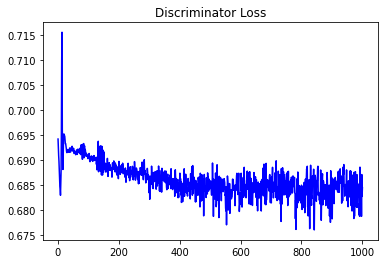

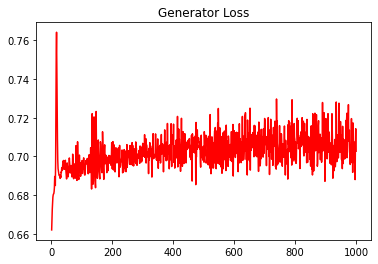

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.35418697524614917


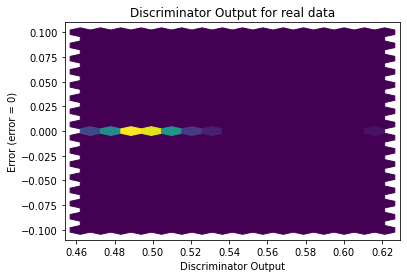

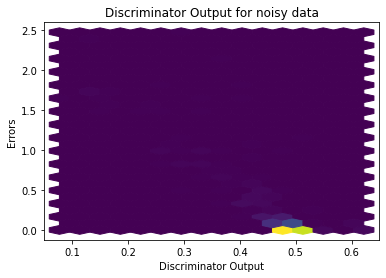

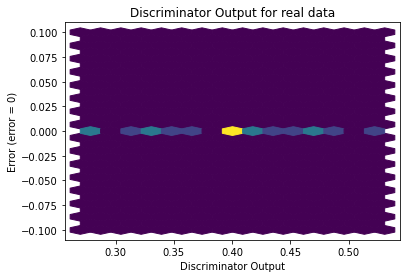

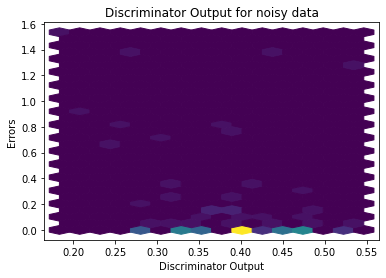

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


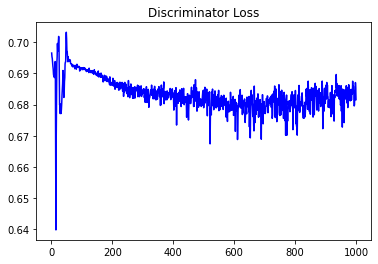

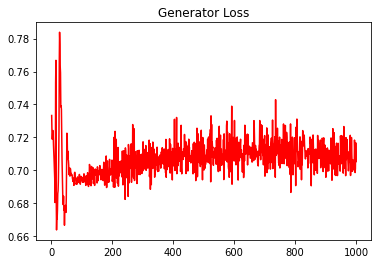

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2006372751285539


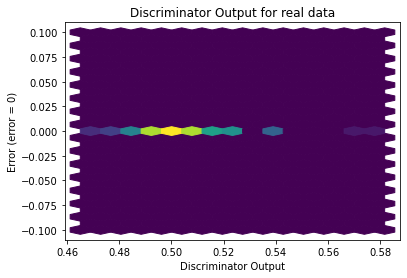

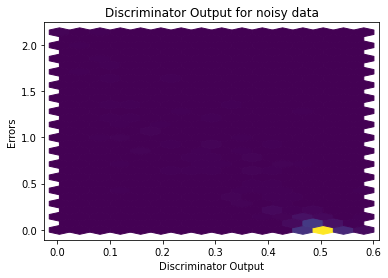

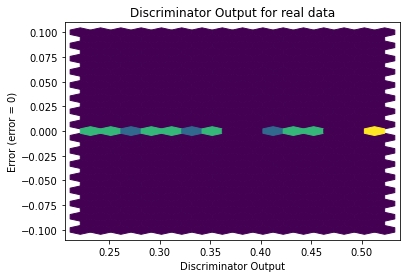

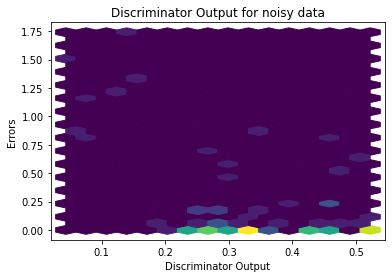

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8873]], requires_grad=True)
